In [1]:
!pip install pingouin
import numpy as np
import pandas as pd
from pingouin import ancova
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.api as sm
import statistics as sta 
from scipy import stats
import statsmodels.stats.api as sms
from scipy.stats import shapiro
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
np.set_printoptions(formatter={'float': lambda x: "{:.4f}".format(x)})
pd.options.display.float_format = "{:.4f}".format
from scipy.stats import t
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency



  Using cached pingouin-0.5.3-py3-none-any.whl (198 kB)
  Using cached pandas_flavor-0.5.0-py3-none-any.whl (7.1 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached outdated-0.2.2-py2.py3-none-any.whl (7.5 kB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
  Using cached xarray-2023.4.0-py3-none-any.whl (977 kB)
  Using cached littleutils-0.2.2-py3-none-any.whl


In [2]:
#Import the data set
url = 'https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'
df = pd.read_csv(url)

In [3]:
#Import the data set
#df = pd.read_csv("/content/2178dataset.csv")

In [4]:
df.head()

Arrest_Year Arrest_Month  EventID     ArrestID  PersonID  \
0         2020    July-Sept  1005907 6017884.0000    326622   
1         2020    July-Sept  1014562 6056669.0000    326622   
2         2020      Oct-Dec  1029922 6057065.0000    326622   
3         2021      Jan-Mar  1052190 6029059.0000    327535   
4         2021      Jan-Mar  1015512 6040372.0000    327535   

      Perceived_Race Sex Age_group__at_arrest_  \
0              White   M   Aged 35 to 44 years   
1              White   M   Aged 35 to 44 years   
2  Unknown or Legacy   M   Aged 35 to 44 years   
3              Black   M   Aged 25 to 34 years   
4        South Asian   M   Aged 25 to 34 years   

  Youth_at_arrest__under_18_years ArrestLocDiv  StripSearch  Booked  \
0                     Not a youth           54            0       1   
1                     Not a youth           54            0       1   
2                     Not a youth           54            0       1   
3                     Not a youth           XX            0       0   
4                     Not a youth           XX            0       1   

                      Occurrence_Category  Actions_at_arrest___Concealed_i  \
0  Assault & Other crimes against persons                                0   
1  Assault & Other crimes against persons                                0   
2  Assault & Other crimes against persons                                0   
3                  Harassment/Threatening                                0   
4       FTA/FTC/Compliance Check/Parollee                                0   

   Actions_at_arrest___Combative__  Actions_at_arrest___Resisted__d  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Actions_at_arrest___Mental_inst  Actions_at_arrest___Assaulted_o  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Actions_at_arrest___Cooperative  SearchReason_CauseInjury  \
0                                1                       NaN   
1                                0                       NaN   
2                                0                       NaN   
3                                0                       NaN   
4                                0                       NaN   

   SearchReason_AssistEscape  SearchReason_PossessWeapons  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

   SearchReason_PossessEvidence  ItemsFound  ObjectId  
0                           NaN         NaN         1  
1                           NaN         NaN         2  
2                           NaN         NaN         3  
3                           NaN         NaN         4  
4                           NaN         NaN         5

Data Cleanning

In [5]:
#remove rows without arrested ID 
df = df[df['ArrestID'].notnull()]

In [6]:
# remove any rows has a value of 'U' in Sex
df.drop(df[df['Sex'] == 'U'].index, inplace = True)
df['Sex']. value_counts()

M    52256
F    12542
Name: Sex, dtype: int64

In [7]:
# replaces the value 'Youth (aged 17 and younger)' into 'Youth'
df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace({'Youth (aged 17 and younger)':'Youth',
                                                                                       'Youth (aged 17 years and under)':'Youth'})

In [8]:
# rename the variable
df = df.rename(columns={"Youth_at_arrest__under_18_years": "Youth"})

In [9]:
# Count the number of arrests by each person, and create the new varaible "Number_Arrests"
df_1 = df
number_arrests = df_1.groupby("PersonID").size()
df_1["Number_Arrests"] = df_1["PersonID"].map(number_arrests)

In [10]:
# Count the number of strip search by each person, and create the new varaible "Number_StripSearches"
number_strip_search = df_1.groupby("PersonID")["StripSearch"].sum()
df_1["Number_StripSearches"] = df_1["PersonID"].map(number_strip_search)

In [11]:
df_1 = df_1.drop_duplicates(subset="PersonID", keep="first")

In [12]:
print(df_1['Number_Arrests'].value_counts())

1     26839
2      5288
3      2075
4      1017
5       626
6       415
7       267
8       188
9       133
10      112
11       61
12       57
13       50
14       40
15       28
17       22
16       19
21       17
20       15
18        8
22        7
23        7
26        5
25        5
28        4
19        4
31        3
24        3
32        2
30        2
27        2
35        1
46        1
39        1
41        1
54        1
Name: Number_Arrests, dtype: int64


In [13]:
print(df_1['Number_StripSearches'].value_counts())

0     32332
1      3726
2       766
3       259
4       111
5        62
6        23
7        19
8        10
10        6
9         5
11        3
12        2
17        1
13        1
Name: Number_StripSearches, dtype: int64


# EDA For RQ1

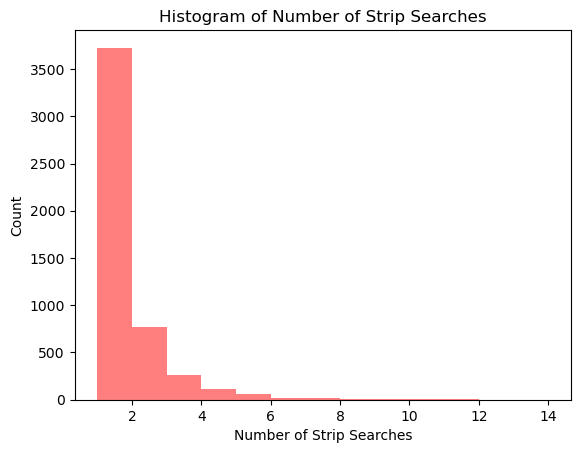

In [14]:
#create the histogram about the number of strip searches
plt.hist(df_1['Number_StripSearches'], bins=range(1, 15), alpha=0.5, color='Red')
plt.title('Histogram of Number of Strip Searches')
plt.xlabel('Number of Strip Searches')
plt.ylabel('Count')
plt.show()

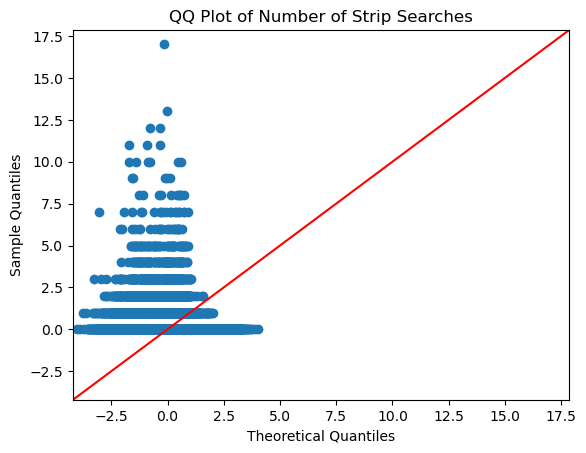

In [15]:
#create qq plots to check the nomality of number of strip searches
qq_strip_df = sm.qqplot(df_1.loc[:,['Number_StripSearches']], line='45')
plt.title('QQ Plot of Number of Strip Searches')
plt.show()

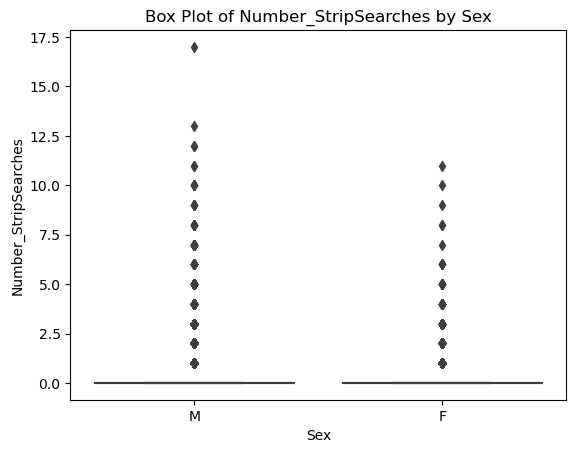

In [16]:
# create a boxplot about the number of strip search by sex
sns.boxplot(x='Sex', y='Number_StripSearches', data=df_1)
plt.title('Box Plot of Number_StripSearches by Sex')
plt.show()

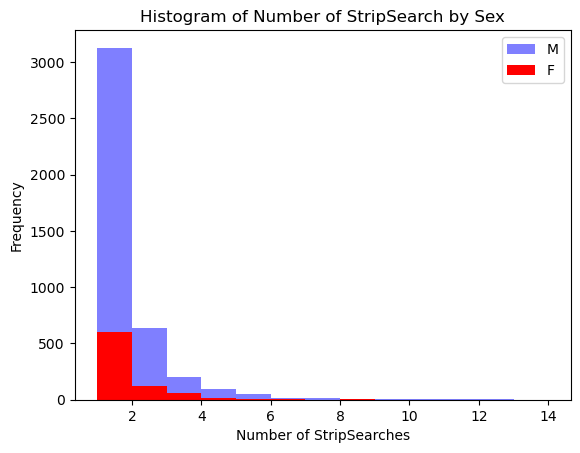

In [17]:
# create a histogram about the number of strip search by sex
df_male = df_1[df_1['Sex'] == 'M']
df_female = df_1[df_1['Sex'] == 'F']

plt.hist(df_male['Number_StripSearches'], alpha=0.5, bins=range(1, 15), color='Blue')
plt.hist(df_female['Number_StripSearches'], bins=range(1, 15), color='Red')
plt.xlabel('Number of StripSearches')
plt.ylabel('Frequency')
plt.legend(df_1["Sex"].unique())
plt.title('Histogram of Number of StripSearch by Sex')
plt.show()

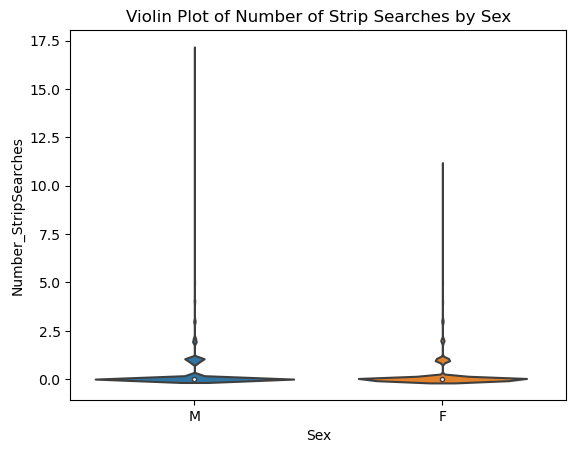

In [18]:
# create a violin plot of Number of Strip Searches by Sex
sns.violinplot(data=df_1, x='Sex', y='Number_StripSearches')
plt.title('Violin Plot of Number of Strip Searches by Sex')
plt.show()

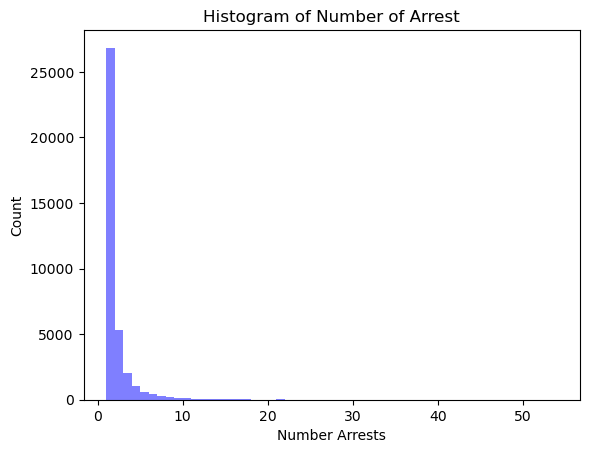

In [19]:
#create histogram of Arrested Times
plt.hist(df_1['Number_Arrests'], bins=range(1, 55), alpha=0.5, color='Blue')
plt.title('Histogram of Number of Arrest')
plt.xlabel('Number Arrests')
plt.ylabel('Count')
plt.show()

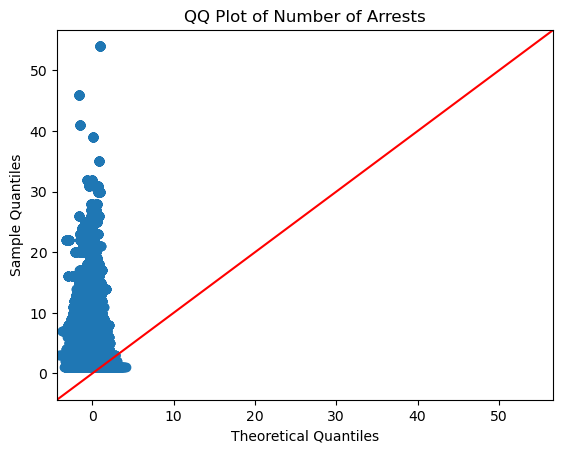

In [20]:
#create qq plots of arrested times 
qq_arrested_df = sm.qqplot(df.loc[:,['Number_Arrests']], line='45')
plt.title('QQ Plot of Number of Arrests')
plt.show()

In [21]:
#conduct formal statistics test "Shapiro–Wilk test" to check the normality of the dependent variables
#H0: the sample are normally distributed
#Ha: the sample are not normally distributed
print('Shapiro Result for number of arrested times:',(shapiro(df['Number_Arrests'])),'Shapiro Result for Number of strip searched times:',(shapiro(df['Number_Arrests'])))

Shapiro Result for number of arrested times: ShapiroResult(statistic=0.6113597750663757, pvalue=0.0) Shapiro Result for Number of strip searched times: ShapiroResult(statistic=0.6113597750663757, pvalue=0.0)


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
shapiro(df['Number_Arrests']).pvalue

0.0

In [23]:
#Conduct t-test of the arrested times by sex
# H0: the true difference between the means of female and male is zero.(μ1 = μ2)
# H1: the true difference between the means of female and male is different from zero.(μ1 ≠ μ2)
male_at = df_male['Number_StripSearches'].values
female_at = df_female['Number_StripSearches'].values

t_stat, p_value = stats.ttest_ind(male_at, female_at, equal_var = False)
print("T-statistic value:", t_stat)  
print("P-Value: ", p_value)

T-statistic value: 6.490517615525306
P-Value:  8.854777138505542e-11


In [24]:
#Calculate mean and standard deviation of groups 
print('Mean strip search times, male, female:',male_at.mean(), female_at.mean())
print('Standard deviation for strip search times, male, female:',male_at.std(), female_at.std())

Mean strip search times, male, female: 0.20656865389803075 0.15723598435462843
Standard deviation for strip search times, male, female: 0.6614393680236372 0.5743738048075171


In [25]:
#compute confidence interval 
cm_q1_sex = sms.CompareMeans(sms.DescrStatsW(male_at), sms.DescrStatsW(female_at))
print('Confidence interval for strip search times:',cm_q1_sex.tconfint_diff(usevar='unequal'))

Confidence interval for strip search times: (0.03443416979532822, 0.06423116929147642)


# EDA For RQ2

In [26]:
df_lr = df

In [27]:
df_lr.describe()

Arrest_Year      EventID     ArrestID    PersonID  StripSearch  \
count   64798.0000   64798.0000   64798.0000  64798.0000   64798.0000   
mean     2020.5135 1029989.2491 6032401.4968 318601.1376       0.1132   
std         0.4998   17318.9366   18707.4464  10813.8379       0.3168   
min      2020.0000 1000000.0000 6000000.0000 300000.0000       0.0000   
25%      2020.0000 1014990.2500 6016201.2500 309217.2500       0.0000   
50%      2021.0000 1029987.5000 6032401.5000 318597.5000       0.0000   
75%      2021.0000 1044992.7500 6048601.7500 327922.0000       0.0000   
max      2021.0000 1060002.0000 6064804.0000 337346.0000       1.0000   

          Booked  Actions_at_arrest___Concealed_i  \
count 64798.0000                       64798.0000   
mean      0.5233                           0.0041   
std       0.4995                           0.0639   
min       0.0000                           0.0000   
25%       0.0000                           0.0000   
50%       1.0000                           0.0000   
75%       1.0000                           0.0000   
max       1.0000                           1.0000   

       Actions_at_arrest___Combative__  Actions_at_arrest___Resisted__d  \
count                       64798.0000                       64798.0000   
mean                            0.0444                           0.0386   
std                             0.2061                           0.1927   
min                             0.0000                           0.0000   
25%                             0.0000                           0.0000   
50%                             0.0000                           0.0000   
75%                             0.0000                           0.0000   
max                             1.0000                           1.0000   

       Actions_at_arrest___Mental_inst  Actions_at_arrest___Assaulted_o  \
count                       64798.0000                       64798.0000   
mean                            0.0336                           0.0064   
std                             0.1802                           0.0798   
min                             0.0000                           0.0000   
25%                             0.0000                           0.0000   
50%                             0.0000                           0.0000   
75%                             0.0000                           0.0000   
max                             1.0000                           1.0000   

       Actions_at_arrest___Cooperative  SearchReason_CauseInjury  \
count                       64798.0000                 7332.0000   
mean                            0.4492                    0.7654   
std                             0.4974                    0.4238   
min                             0.0000                    0.0000   
25%                             0.0000                    1.0000   
50%                             0.0000                    1.0000   
75%                             1.0000                    1.0000   
max                             1.0000                    1.0000   

       SearchReason_AssistEscape  SearchReason_PossessWeapons  \
count                  7332.0000                    7332.0000   
mean                      0.3402                       0.4543   
std                       0.4738                       0.4979   
min                       0.0000                       0.0000   
25%                       0.0000                       0.0000   
50%                       0.0000                       0.0000   
75%                       1.0000                       1.0000   
max                       1.0000                       1.0000   

       SearchReason_PossessEvidence  ItemsFound   ObjectId  Number_Arrests  \
count                     7332.0000   7332.0000 64798.0000      64798.0000   
mean                         0.4210      0.3759 32674.7262          4.0689   
std                          0.4938      0.4844 18852.4490          5.3325   
min     

In [28]:
df_lr['StripSearch'] = df_lr['StripSearch'].astype('category')
df_lr['StripSearch'].describe()

count     64798
unique        2
top           0
freq      57466
Name: StripSearch, dtype: int64

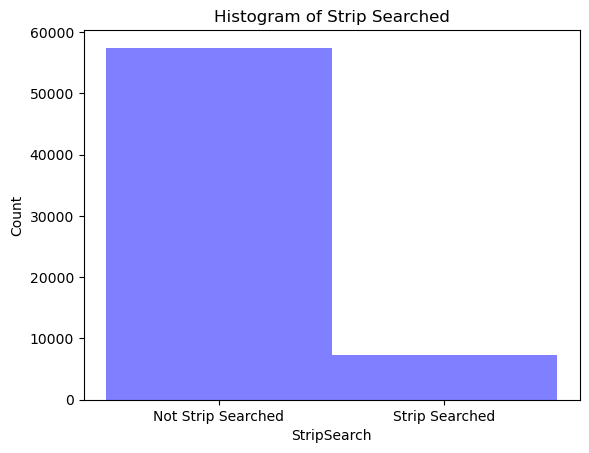

In [29]:
#create histogram of the count of strip search
plt.hist(df_lr['StripSearch'], bins=2, alpha=0.5, color='Blue')
plt.title('Histogram of Strip Searched')
plt.xlabel('StripSearch')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Strip Searched', 'Strip Searched'])
plt.show()

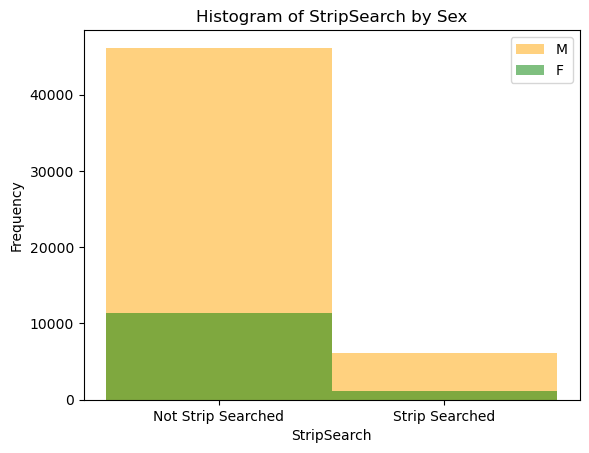

In [30]:
# create a histogram about the strip search by sex
df_lr_male = df_lr[df_lr['Sex'] == 'M']
df_lr_female = df_lr[df_lr['Sex'] == 'F']

plt.hist(df_lr_male['StripSearch'], alpha=0.5, bins=2, color='Orange')
plt.hist(df_lr_female['StripSearch'], alpha=0.5, bins=2, color='Green')
plt.xlabel('StripSearch')
plt.ylabel('Frequency')
plt.legend(df["Sex"].unique())
plt.title('Histogram of StripSearch by Sex')
plt.xticks([0.25, 0.75], ['Not Strip Searched', 'Strip Searched'])
plt.show()

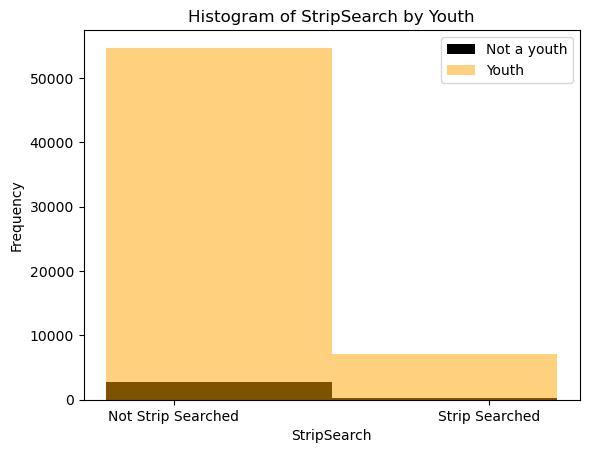

In [31]:
# create a histogram about the strip search by youth
df_lr_youth = df_lr[df_lr['Youth']=='Youth']
df__lr_not_youth = df_lr[df_lr['Youth']=='Not a youth']

plt.hist(df_lr_youth['StripSearch'], bins=2, color='Black')
plt.hist(df__lr_not_youth['StripSearch'], alpha=0.5, bins=2, color='Orange')
plt.xlabel('StripSearch')
plt.ylabel('Frequency')
plt.legend(df["Youth"].unique())
plt.title('Histogram of StripSearch by Youth')
plt.xticks([0.15, 0.85], ['Not Strip Searched', 'Strip Searched'])
plt.show()

In [32]:
# plot a barplot for Action Arrest
df_action = pd.DataFrame({
    'Action Concealed': df_lr['Actions_at_arrest___Concealed_i'],
    'Action Combative': df_lr['Actions_at_arrest___Combative__'],
    'Action Resisted': df_lr['Actions_at_arrest___Resisted__d'],
    'Action Mental insanity': df_lr['Actions_at_arrest___Mental_inst'],
    'Action Assaulted': df_lr['Actions_at_arrest___Assaulted_o'],
    'Action Cooperative': df_lr['Actions_at_arrest___Cooperative']})

fig = make_subplots(rows=3, cols=2, subplot_titles=('Action Concealed', 'Action Combative', 'Action Resisted',
                                                    'Action Mental insanity','Action Assaulted', 'Action Cooperative'))
Len= len(df_action)
cols = list(df_action.columns)
for i, col in enumerate(cols):
    num = df_action[col].sum()
    fig.add_trace(go.Bar(x=['Yes', 'No'], y=[num, Len-num], name=col ), row=(i//2)+1, col=(i%2)+1)
fig.update_layout(bargap=0.05, width=600, height=1500, title = "Actions At Arrest",)

In [33]:
for col in df_action.columns:
    df_action[col] = df_action[col].astype('category')

In [34]:
df_action.describe()

Action Concealed  Action Combative  Action Resisted  \
count              64798             64798            64798   
unique                 2                 2                2   
top                    0                 0                0   
freq               64532             61918            62296   

        Action Mental insanity  Action Assaulted  Action Cooperative  
count                    64798             64798               64798  
unique                       2                 2                   2  
top                          0                 0                   0  
freq                     62621             64383               35692

In [35]:
Strip_Searched = df[df['StripSearch']==1]

data1 = pd.crosstab([Strip_Searched['Sex']],[Strip_Searched['Youth']],normalize = True,
                             margins = False)
print(data1)

Youth  Not a youth  Youth
Sex                      
F           0.1607 0.0041
M           0.8037 0.0315


<AxesSubplot: xlabel='Youth', ylabel='Sex'>

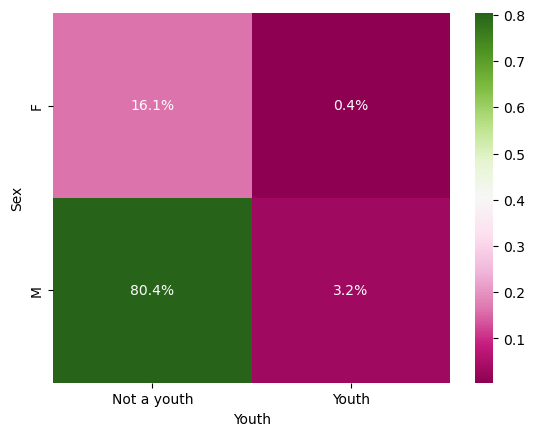

In [36]:
sns.heatmap(data=data1, annot=True, fmt='.1%', cmap='PiYG')

In [37]:
data2 = pd.crosstab([Strip_Searched['Actions_at_arrest___Combative__'],
                               Strip_Searched['Actions_at_arrest___Resisted__d'],
                               Strip_Searched['Actions_at_arrest___Assaulted_o'],
                               Strip_Searched['Actions_at_arrest___Concealed_i'],
                               Strip_Searched['Actions_at_arrest___Mental_inst'],
                               Strip_Searched['Actions_at_arrest___Cooperative']],
                             [Strip_Searched['Youth'],Strip_Searched['Sex']],normalize = True,
                             margins = False)
print(data2)

Youth                                                                                                                                                                                           Not a youth  \
Sex                                                                                                                                                                                                       F   
Actions_at_arrest___Combative__ Actions_at_arrest___Resisted__d Actions_at_arrest___Assaulted_o Actions_at_arrest___Concealed_i Actions_at_arrest___Mental_inst Actions_at_arrest___Cooperative               
0                               0                               0                               0                               0                               0                                    0.0629   
                                                                                                                                                                1           

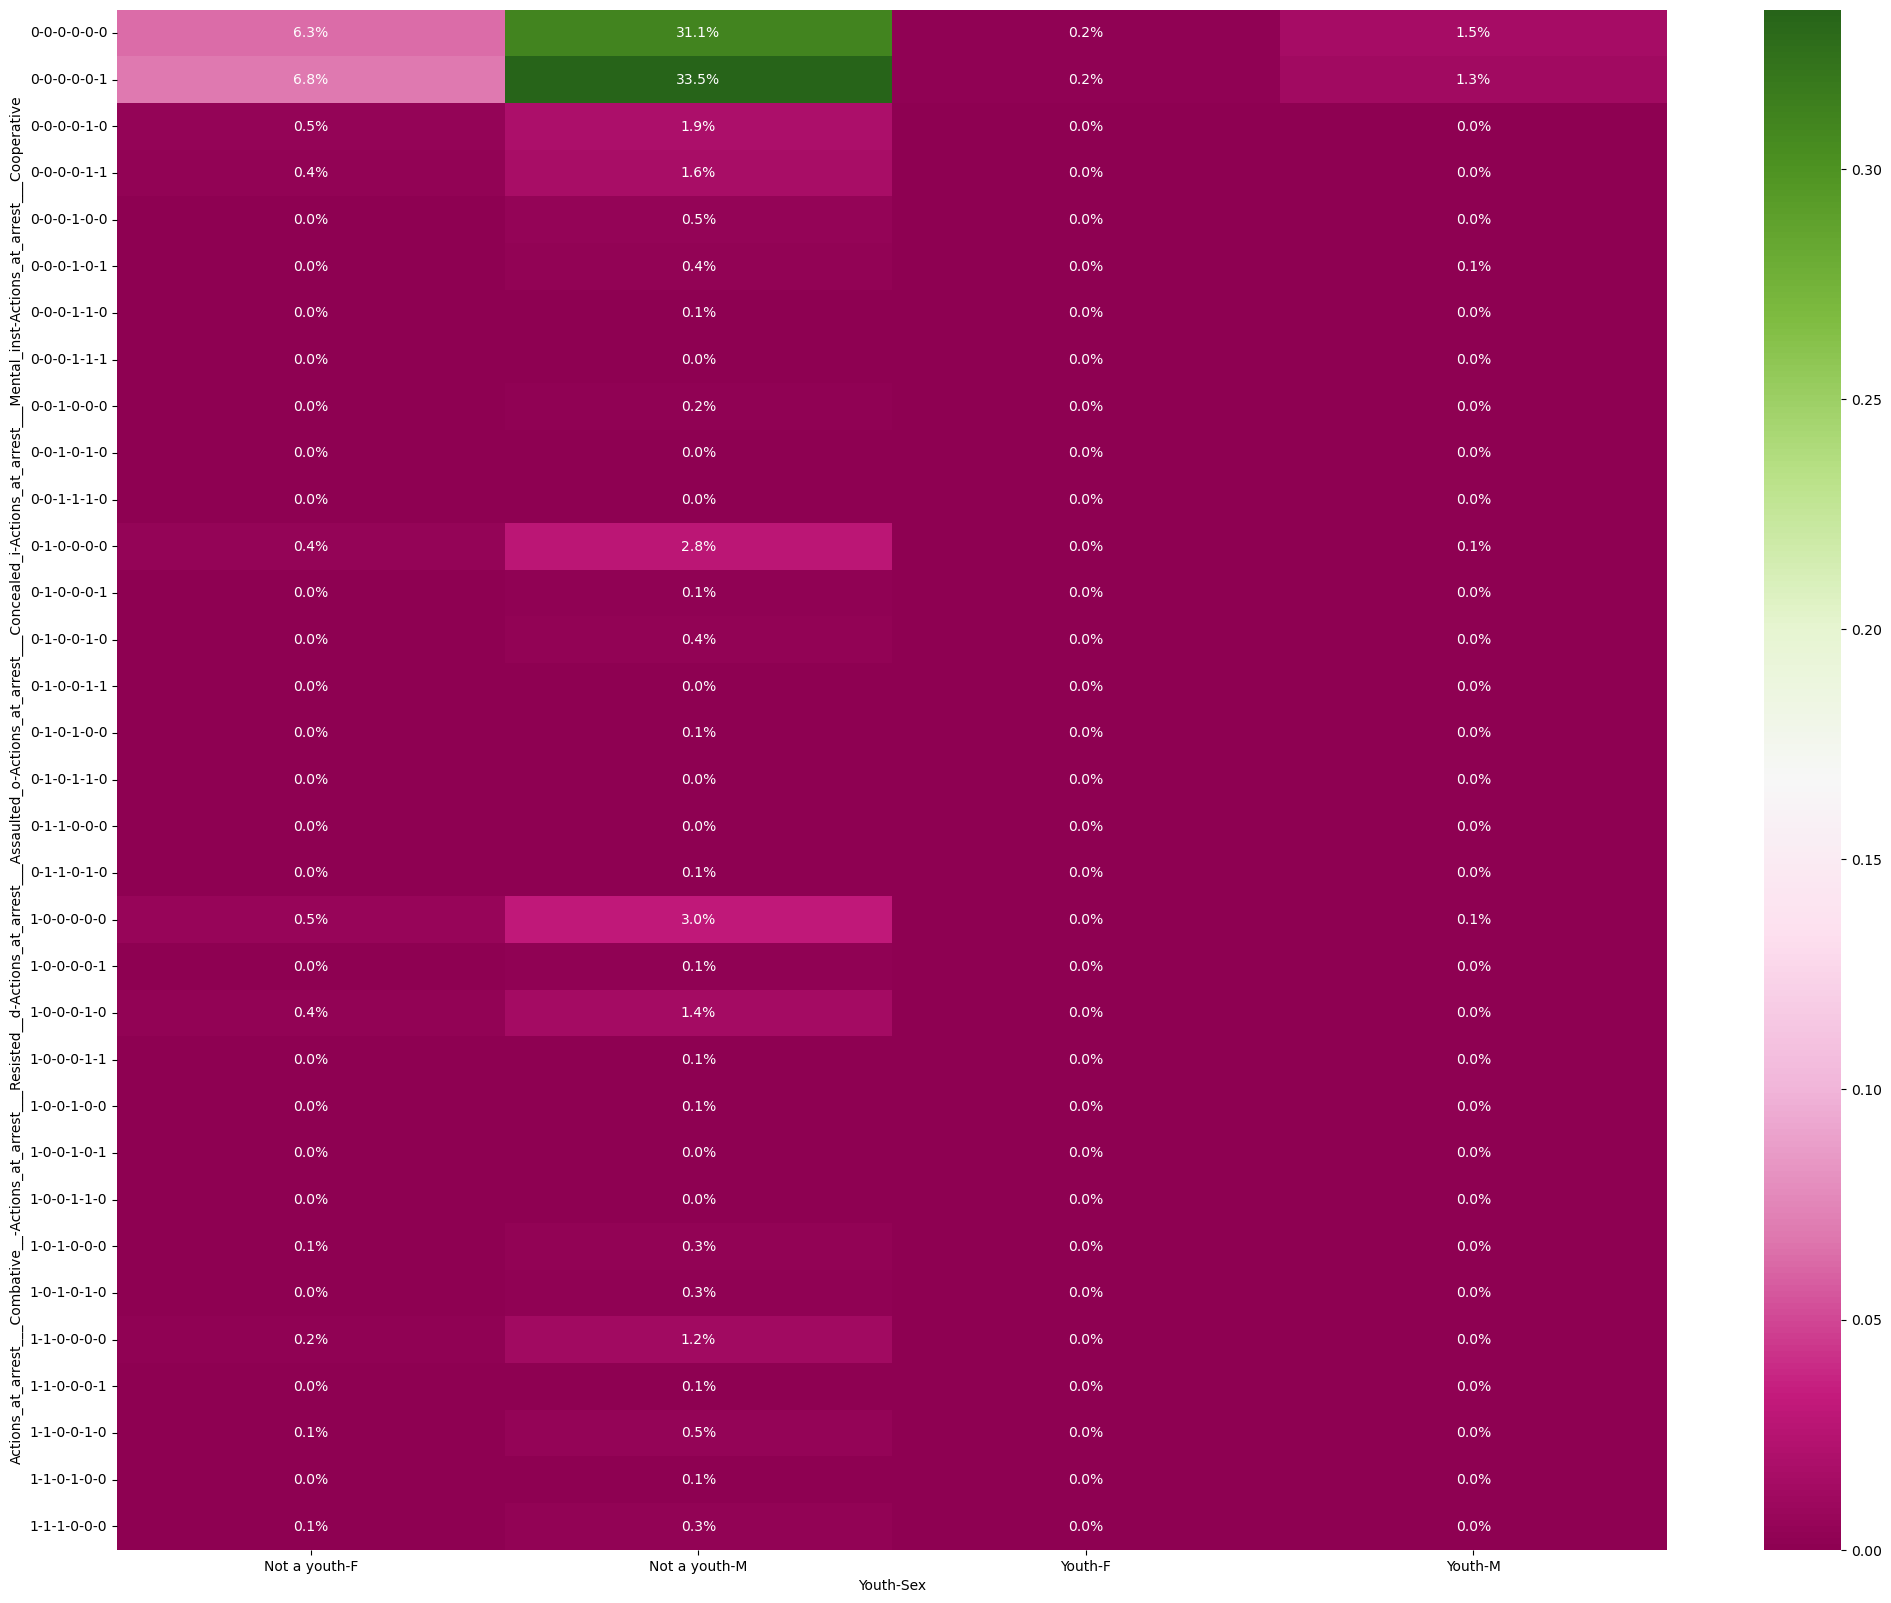

In [38]:
plt.figure(figsize=(25, 20))
sns.heatmap(data=data2, annot=True, fmt='.1%', cmap='PiYG')
plt.show()

In [39]:
# Chi-Squared for Sex
# H0: There is no association between StripSearch and Sex.
# H1: There is an association between StripSearch and Sex.
cont_table = pd.crosstab(df["StripSearch"], df["Sex"])
cont_table

Sex              F      M
StripSearch              
0            11334  46132
1             1208   6124

In [40]:
stats.chi2_contingency(cont_table)

Chi2ContingencyResult(statistic=43.71823142138674, pvalue=3.792225643334638e-11, dof=1, expected_freq=array([[11122.8521, 46343.1479],
       [1419.1479, 5912.8521]]))

In [41]:
# Chi-Squared for Youth
# H0: There is no association between StripSearch and Youth.
# H1: There is an association between StripSearch and Youth.
cont_table2 = pd.crosstab(df["StripSearch"], df["Youth"])
cont_table2

Youth        Not a youth  Youth
StripSearch                    
0                  54704   2762
1                   7071    261

In [42]:
stats.chi2_contingency(cont_table2)

Chi2ContingencyResult(statistic=22.439411310290293, pvalue=2.168778036670357e-06, dof=1, expected_freq=array([[54785.0574, 2680.9426],
       [6989.9426, 342.0574]]))

In [43]:
# Chi-Squared for Actions resisted at Arrest
# H0: There is no association between StripSearch and Action arrest resisted.
# H1: There is an association between StripSearch and Action arrest resisted.
cont_table3 = pd.crosstab(df["StripSearch"], df["Actions_at_arrest___Resisted__d"])
cont_table3

Actions_at_arrest___Resisted__d      0     1
StripSearch                                 
0                                55456  2010
1                                 6840   492

In [44]:
stats.chi2_contingency(cont_table3)

Chi2ContingencyResult(statistic=179.9189120553566, pvalue=5.048067189149968e-41, dof=1, expected_freq=array([[55247.1054, 2218.8946],
       [7048.8946, 283.1054]]))

In [45]:
# Chi-Squared for Actions assaulted at Arrest
# H0: There is no association between StripSearch and Action arrest assaulted.
# H1: There is an association between StripSearch and Action arrest assaulted.
cont_table4 = pd.crosstab(df["StripSearch"], df["Actions_at_arrest___Assaulted_o"])
cont_table4

Actions_at_arrest___Assaulted_o      0    1
StripSearch                                
0                                57162  304
1                                 7221  111

In [46]:
stats.chi2_contingency(cont_table4)

Chi2ContingencyResult(statistic=97.57864433261375, pvalue=5.175915969586206e-23, dof=1, expected_freq=array([[57097.9579, 368.0421],
       [7285.0421, 46.9579]]))

In [47]:
# Chi-Squared for Actions conceled items
# H0: There is no association between StripSearch and Action 'Actions_at_arrest___Concealed_i'.
# H1: There is an association between StripSearch and Action "Actions_at_arrest___Concealed_i".
cont_table5 = pd.crosstab(df["StripSearch"], df["Actions_at_arrest___Concealed_i"])
stats.chi2_contingency(cont_table5)

Chi2ContingencyResult(statistic=261.66404174011586, pvalue=7.443876245823319e-59, dof=1, expected_freq=array([[57230.0983, 235.9017],
       [7301.9017, 30.0983]]))

In [48]:
# Chi-Squared for Actions "Actions_at_arrest___Combative__"
# H0: There is no association between StripSearch and Action "Actions_at_arrest___Combative__'.
# H1: There is an association between StripSearch and Action "Actions_at_arrest___Combative__".
cont_table6 = pd.crosstab(df["StripSearch"], df["Actions_at_arrest___Combative__"])
stats.chi2_contingency(cont_table6)

Chi2ContingencyResult(statistic=432.5615724752886, pvalue=4.501588788622434e-96, dof=1, expected_freq=array([[54911.8767, 2554.1233],
       [7006.1233, 325.8767]]))

In [49]:
# Chi-Squared for Actions "Actions_at_arrest___Mental_inst"
# H0: There is no association between StripSearch and Action "Actions_at_arrest___Mental_inst".
# H1: There is an association between StripSearch and Action "Actions_at_arrest___Mental_inst".
cont_table7 = pd.crosstab(df["StripSearch"], df["Actions_at_arrest___Mental_inst"])
stats.chi2_contingency(cont_table7)

Chi2ContingencyResult(statistic=567.6086361677886, pvalue=1.859963796473896e-125, dof=1, expected_freq=array([[55535.3311, 1930.6689],
       [7085.6689, 246.3311]]))

In [50]:
# Chi-Squared for Actions Actions_at_arrest___Cooperative"
# H0: There is no association between StripSearch and Action "Actions_at_arrest___Cooperative".
# H1: There is an association between StripSearch and Action "Actions_at_arrest___Cooperative".
cont_table8 = pd.crosstab(df["StripSearch"], df["Actions_at_arrest___Cooperative"])
stats.chi2_contingency(cont_table8)

Chi2ContingencyResult(statistic=0.0737369476716332, pvalue=0.7859715252630238, dof=1, expected_freq=array([[31653.3916, 25812.6084],
       [4038.6084, 3293.3916]]))

In [51]:

female_youth = df_lr[(df_lr['Sex'] == 'F') & (df_lr['Youth'] == 'Youth')]
male_youth = df_lr[(df_lr['Sex'] == 'M') & (df_lr['Youth'] == 'Youth')]
female_not_youth = df_lr[(df_lr['Sex'] == 'F') & (df_lr['Youth'] == 'Not a youth')]
male_not_youth = df_lr[(df_lr['Sex'] == 'M') & (df_lr['Youth'] == 'Not a youth')]


In [52]:
#reference: https://github.com/shionguha/inf2178-expdesignfordatascience-w23/blob/main/notebooks/power.ipynb
#code for Cohen's D 

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)
     

In [53]:
F_df = df_1[df_1['Sex']=='F']
M_df = df_1[df_1['Sex']=='M']

F_ss = F_df['Number_StripSearches']
M_ss = M_df['Number_StripSearches']

In [54]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(M_ss,F_ss)
alpha = 0.05
power = 0.8
ratio_ =len(M_ss)/len(F_ss) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for StripSearch:',effect_size)

Effect size (Cohen's D) for StripSearch: 0.07654093249847302


In [55]:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for F_ss') 
print('Actual size of F_ss:', len(F_ss))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for M_ss')
print('Actual size of M_ss:', len(M_ss))

Sample Size of nobs1: 1686.629 needed for F_ss
Actual size of F_ss: 7670
Sample Size of nobs2: 6521.340 needed for M_ss
Actual size of M_ss: 29656


In [56]:
#another way to go about this is the other direction. We can test the power of a proposed sample size 

from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs=7670, effect_size = 0.8, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

invalid value encountered in _nct_sf

/opt/conda/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

invalid value encountered in _nct_cdf



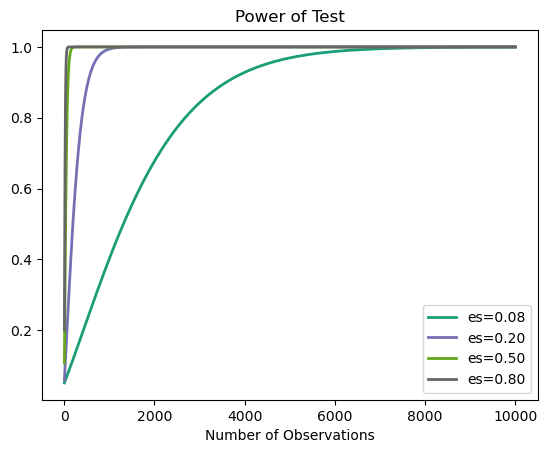

In [57]:
#lastly power curve

effect_sizes = np.array([0.07654, 0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 10000))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

ANCOVA

In [58]:
#conduct formal statistics test "Shapiro–Wilk test" to check the normality of the dependent variables
#H0: the Number of Strip Search are normally distributed
#Ha: the Number of Strip Search are not normally distributed
Female_strip = df_female['Number_StripSearches']
Male_strip = df_male['Number_StripSearches']

print('Shapiro Result for Male:',(shapiro(Male_strip)),
      'Shapiro Result for Female:',(shapiro(Female_strip)))

Shapiro Result for Male: ShapiroResult(statistic=0.3417043685913086, pvalue=0.0) Shapiro Result for Female: ShapiroResult(statistic=0.2967637777328491, pvalue=0.0)


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



In [59]:
#Conduct the Levene's test to check if the variance are the same between male's and female's strip searches times
#H0:the variance between the two groups are equal
#H1:the variance between the two groups are not equal

stats.levene(male_at, female_at, center='mean')

LeveneResult(statistic=111.32526801663215, pvalue=5.463553651023311e-26)

In [60]:
# Assumption check homogeneity of regression slopes to check there is no interaction between the covariate arrests times and independent variable sex
model = ols('Number_StripSearches ~ Number_Arrests * Sex', data=df_1).fit()
anova_lm(model, type=2)

df    sum_sq   mean_sq          F  PR(>F)
Sex                    1.0000   14.8308   14.8308    59.2385  0.0000
Number_Arrests         1.0000 6157.7517 6157.7517 24595.7875  0.0000
Number_Arrests:Sex     1.0000    3.3216    3.3216    13.2675  0.0003
Residual           37322.0000 9343.8605    0.2504        NaN     NaN

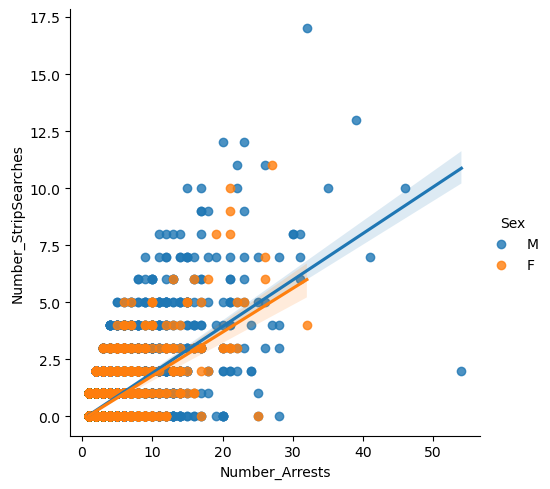

In [61]:
# Check if the relationship between the covariate and at each group of the independent variable sex is linear. 
sns.lmplot(x='Number_Arrests', y='Number_StripSearches', hue='Sex', data=df_1)

In [62]:
df_ancova = df_1[['Number_StripSearches', 'Number_Arrests', 'Sex']].copy()

In [63]:
df_ancova.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37326 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Number_StripSearches  37326 non-null  int64 
 1   Number_Arrests        37326 non-null  int64 
 2   Sex                   37326 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [64]:
#what is the conditional proability of predicitng y = p(x_1|x_2)
ancova(data=df_ancova, dv='Number_StripSearches', covar='Number_Arrests', between='Sex')

Source        SS     DF          F  p-unc    np2
0             Sex    3.2557      1    12.9999 0.0003 0.0003
1  Number_Arrests 6157.7517      1 24587.7058 0.0000 0.3971
2        Residual 9347.1822  37323        NaN    NaN    NaN

Logistic Regression

In [65]:
x = df_lr[['Sex', 'Youth', 'Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative']].copy()
x['Sex'] = pd.get_dummies(df_lr.Sex, drop_first=True)
x['Youth'] = pd.get_dummies(df_lr.Youth, drop_first=True)
df_lr['StripSearch'] = df_lr['StripSearch'].replace({1:'StripSearched', 0:'NotStripSearched'})
y = pd.get_dummies(df_lr.StripSearch, drop_first=True)


In [66]:
df_lr['Actions_at_arrest___Combative__'] = df_lr['Actions_at_arrest___Combative__'].replace({'No': 0, 'Yes': 1})
df_lr['Actions_at_arrest___Resisted__d'] = df_lr['Actions_at_arrest___Resisted__d'].replace({'No': 0, 'Yes': 1})
df_lr['Actions_at_arrest___Assaulted_o'] = df_lr['Actions_at_arrest___Assaulted_o'].replace({'No': 0, 'Yes': 1})


In [67]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64798 entries, 0 to 65275
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   StripSearched  64798 non-null  uint8
dtypes: uint8(1)
memory usage: 569.5 KB


In [68]:
y

StripSearched
0                  0
1                  0
2                  0
3                  0
4                  0
...              ...
65271              0
65272              0
65273              0
65274              0
65275              0

[64798 rows x 1 columns]

In [69]:
x['Youth'].value_counts()

0    61775
1     3023
Name: Youth, dtype: int64

In [70]:
#type(series_y)

In [71]:
from sklearn.model_selection import train_test_split
#split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

In [72]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(y_train.describe().T)
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
display(y_test.describe().T)

X_train shape: (51838, 8)
y_train shape: (51838, 1)

========== Training data ==========


count   mean    std    min    25%    50%    75%    max
StripSearched 51838.0000 0.1118 0.3151 0.0000 0.0000 0.0000 0.0000 1.0000

X_test shape: (12960, 8)
y_test shape: (12960, 1)

========== Test data ==========


count   mean    std    min    25%    50%    75%    max
StripSearched 12960.0000 0.1187 0.3235 0.0000 0.0000 0.0000 0.0000 1.0000

In [73]:
type(y_test)

pandas.core.frame.DataFrame

In [74]:
len(y_test)

12960

In [75]:
trainingdata = pd.concat([x_train,y_train], axis = 1)

In [76]:
trainingdata

Sex  Youth  Actions_at_arrest___Concealed_i  \
44591    1      0                                0   
13541    1      0                                0   
48349    1      0                                0   
6712     1      0                                0   
7107     1      0                                0   
...    ...    ...                              ...   
61882    1      0                                0   
17898    1      0                                0   
28266    1      0                                0   
15873    0      0                                0   
53185    1      0                                0   

       Actions_at_arrest___Combative__  Actions_at_arrest___Resisted__d  \
44591                                0                                0   
13541                                0                                0   
48349                                0                                0   
6712                                 0                                0   
7107                                 0                                0   
...                                ...                              ...   
61882                                0                                0   
17898                                0                                0   
28266                                0                                0   
15873                                0                                0   
53185                                0                                0   

       Actions_at_arrest___Mental_inst  Actions_at_arrest___Assaulted_o  \
44591                                0                                0   
13541                                0                                0   
48349                                0                                0   
6712                                 0                                0   
7107                                 0                                0   
...                                ...                              ...   
61882                                0                                0   
17898                                0                                0   
28266                                0                                0   
15873                                0                                0   
53185                                0                                0   

       Actions_at_arrest___Cooperative  StripSearched  
44591                                0              0  
13541                                0              0  
48349                                1              0  
6712                                 0              0  
7107                                 1              0  
...                                ...            ...  
61882                                0              0  
17898                                0              0  
28266                                1              0  
15873                                0              0  
53185                                1              0  

[51838 rows x 9 columns]

In [77]:
reg = smf.logit('StripSearched ~ Youth + Sex + Actions_at_arrest___Concealed_i + Actions_at_arrest___Combative__ + Actions_at_arrest___Resisted__d+Actions_at_arrest___Mental_inst+Actions_at_arrest___Assaulted_o+Actions_at_arrest___Cooperative', data=trainingdata).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.343356
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          StripSearched   No. Observations:                51838
Model:                          Logit   Df Residuals:                    51829
Method:                           MLE   Df Model:                            8
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.01944
Time:                        17:09:52   Log-Likelihood:                -17799.
converged:                       True   LL-Null:                       -18152.
Covariance Type:            nonrobust   LLR p-value:                4.254e-147
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.4187      0.038    -63.759  

In [78]:
# Check if there is multicollinearity among the independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = [variance_inflation_factor(sm.add_constant(x).values, i) for i in range(len(x.columns))]

# Display the VIF values
for i in range(len(x.columns)):
    print(x.columns[i], ':', VIF[i])

Sex : 6.255277641141305
Youth : 1.002076438346022
Actions_at_arrest___Concealed_i : 1.0024881130738246
Actions_at_arrest___Combative__ : 1.0049139034590289
Actions_at_arrest___Resisted__d : 1.1915506660087618
Actions_at_arrest___Mental_inst : 1.090062818923708
Actions_at_arrest___Assaulted_o : 1.0616553756864746
Actions_at_arrest___Cooperative : 1.0674309373536908


In [79]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          StripSearched   No. Observations:                51838
Model:                          Logit   Df Residuals:                    51829
Method:                           MLE   Df Model:                            8
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.01944
Time:                        17:09:52   Log-Likelihood:                -17799.
converged:                       True   LL-Null:                       -18152.
Covariance Type:            nonrobust   LLR p-value:                4.254e-147
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.4187      0.038    -63.759      0.000      -2.493      -2.344
Youth                              -0.2622      0.075     -3.500      0.000      -0.409      -0.115
Sex                                 0.2267      0.038      6.002      0.000       0.153       0.301
Actions_at_arrest___Concealed_i     1.5440      0.144     10.757      0.000       1.263       1.825
Actions_at_arrest___Combative__     0.6176      0.060     10.267      0.000       0.500       0.736
Actions_at_arrest___Resisted__d     0.4457      0.063      7.103      0.000       0.323       0.569
Actions_at_arrest___Mental_inst     0.8532      0.060     14.127      0.000       0.735       0.972
Actions_at_arrest___Assaulted_o     0.4258      0.135      3.150      0.002       0.161       0.691
Actions_at_arrest___Cooperative     0.1243      0.030      4.212      0.000       0.066       0.182
===================================================================================================
"""

In [80]:
#ODDS Ratio
params = reg.params
conf = reg.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

Lower CI  Upper CI     OR
Intercept                          0.0827    0.0959 0.0890
Youth                              0.6643    0.8910 0.7694
Sex                                1.1649    1.3508 1.2544
Actions_at_arrest___Concealed_i    3.5349    6.2048 4.6833
Actions_at_arrest___Combative__    1.6482    2.0865 1.8545
Actions_at_arrest___Resisted__d    1.3809    1.7659 1.5616
Actions_at_arrest___Mental_inst    2.0850    2.6420 2.3471
Actions_at_arrest___Assaulted_o    1.1745    1.9953 1.5309
Actions_at_arrest___Cooperative    1.0687    1.1998 1.1324

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred = reg.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction = list(map(round, pred))

In [82]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction))


Test accuracy =  0.8810185185185185


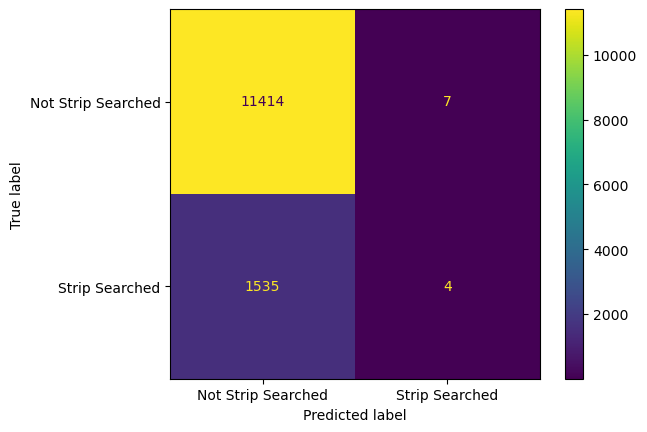

In [83]:
#reference:https://www.w3schools.com/python/python_ml_confusion_matrix.asp
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Strip Searched', 'Strip Searched'])
cm_display.plot()
plt.show()

In [84]:
# plot the prediction interval
Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)

β_ = reg.params.values.reshape(-1, 1)
V_ = reg.cov_params().values

In [85]:
x1 = np.linspace(df_lr.Actions_at_arrest___Cooperative.min(), df_lr.Actions_at_arrest___Cooperative.max(), 200) 
# set a group that is not a youth male and does not have any actions at arrest except cooperative
x1 = np.stack((np.full(200, 1), np.full(200, 1), np.full(200, 0), np.full(200, 0), np.full(200, 0), 
              np.full(200, 0), np.full(200, 0), np.full(200, 0), x1))
xx = np.transpose(x1)

In [86]:
def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((200, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out

In [87]:
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

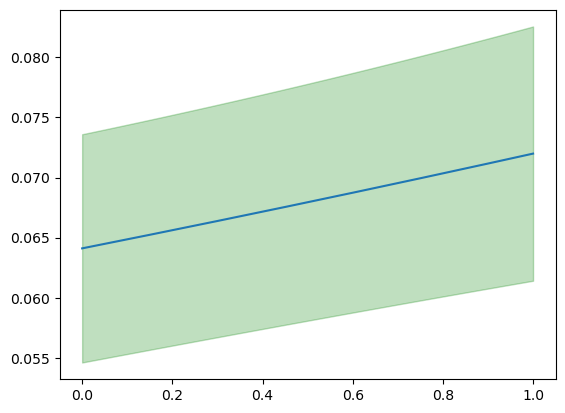

In [88]:
# plot the prediction interval
plt.plot(xx[:, -1], πs)
plt.fill_between(xx[:, -1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(),
                 alpha=.25, color='g')

In [89]:

#reference: https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook
#reference: https://gist.github.com/purnima291/8490fb78bd917450bd32578abd11db43
x_df = df_lr[['Sex', 'Youth', 'Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative']].copy()

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
rows= []

for var1 in x_df:
  col = []
  for var2 in x_df :
    cramers =cramers_v(x_df[var1], x_df[var2]) # Cramer's V test
    col.append(round(cramers,4)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cv = pd.DataFrame(cramers_results, columns = x_df.columns, index =x_df.columns)

df_cv

Sex  Youth  \
Sex                             1.0000 0.0268   
Youth                           0.0268 0.9998   
Actions_at_arrest___Concealed_i 0.0179 0.0109   
Actions_at_arrest___Combative__ 0.0000 0.0234   
Actions_at_arrest___Resisted__d 0.0095 0.0070   
Actions_at_arrest___Mental_inst 0.0176 0.0343   
Actions_at_arrest___Assaulted_o 0.0112 0.0060   
Actions_at_arrest___Cooperative 0.0155 0.0075   

                                 Actions_at_arrest___Concealed_i  \
Sex                                                       0.0179   
Youth                                                     0.0109   
Actions_at_arrest___Concealed_i                           0.9981   
Actions_at_arrest___Combative__                           0.0463   
Actions_at_arrest___Resisted__d                           0.0465   
Actions_at_arrest___Mental_inst                           0.0367   
Actions_at_arrest___Assaulted_o                           0.0202   
Actions_at_arrest___Cooperative                           0.0190   

                                 Actions_at_arrest___Combative__  \
Sex                                                       0.0000   
Youth                                                     0.0234   
Actions_at_arrest___Concealed_i                           0.0463   
Actions_at_arrest___Combative__                           0.9998   
Actions_at_arrest___Resisted__d                           0.2492   
Actions_at_arrest___Mental_inst                           0.2264   
Actions_at_arrest___Assaulted_o                           0.2450   
Actions_at_arrest___Cooperative                           0.1821   

                                 Actions_at_arrest___Resisted__d  \
Sex                                                       0.0095   
Youth                                                     0.0070   
Actions_at_arrest___Concealed_i                           0.0465   
Actions_at_arrest___Combative__                           0.2492   
Actions_at_arrest___Resisted__d                           0.9998   
Actions_at_arrest___Mental_inst                           0.1157   
Actions_at_arrest___Assaulted_o                           0.1008   
Actions_at_arrest___Cooperative                           0.1641   

                                 Actions_at_arrest___Mental_inst  \
Sex                                                       0.0176   
Youth                                                     0.0343   
Actions_at_arrest___Concealed_i                           0.0367   
Actions_at_arrest___Combative__                           0.2264   
Actions_at_arrest___Resisted__d                           0.1157   
Actions_at_arrest___Mental_inst                           0.9998   
Actions_at_arrest___Assaulted_o                           0.0789   
Actions_at_arrest___Cooperative                           0.0740   

                                 Actions_at_arrest___Assaulted_o  \
Sex                                                       0.0112   
Youth                                                     0.0060   
Actions_at_arrest___Concealed_i                           0.0202   
Actions_at_arrest___Combative__                           0.2450   
Actions_at_arrest___Resisted__d                           0.1008   
Actions_at_arrest___Mental_inst                           0.0789   
Actions_at_arrest___Assaulted_o                           0.9988   
Actions_at_arrest___Cooperative                           0.0714   

                                 Actions_at_arrest___Cooperative  
Sex                                                       0.0155  
Youth                                                     0.0075  
Actions_at_arrest___Concealed_i                           0.0190  
Actions_at_arrest___Combative__                           0.1821  
Actions_at_arrest___Resisted__d                           0.1641  
Actions_at_arrest___Mental_inst                           0.0740  
Actions_at_arrest___Assaulted_o                           0

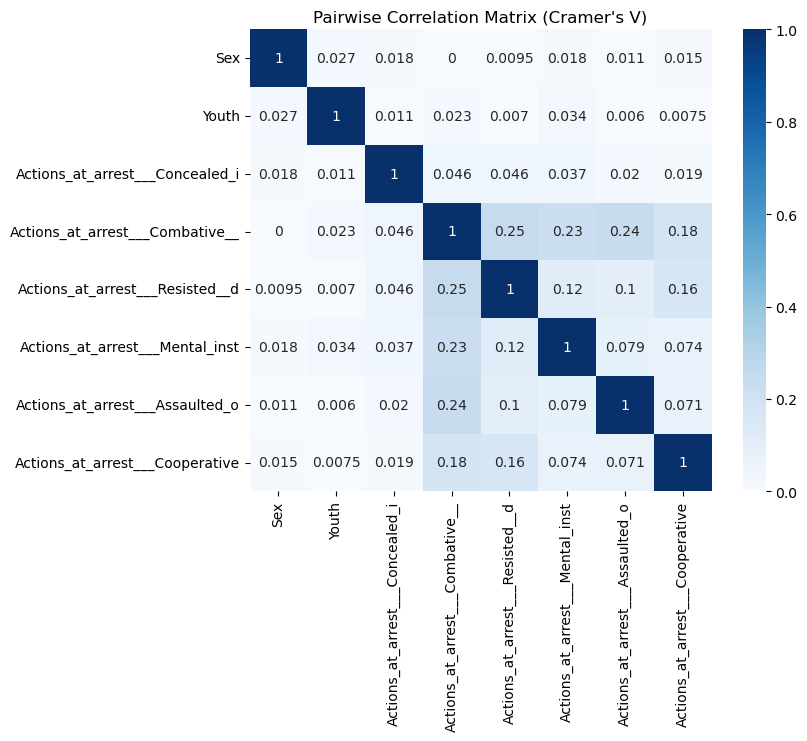

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cv, cmap='Blues', annot=True, square=True)
plt.title('Pairwise Correlation Matrix (Cramer\'s V)')
plt.show()